# **Startup Transformation**
In this project, we are going to analyze a tech startup's data that is looking to improve its operations after a global pandemic has taken the world by storm.<br>

We will apply data transformation techniques to make better sense of the company’s data and also help answer important questions such as:<br>

Is the company in good financial health?<br>
Does the company need to let go of any employees?<br>
Should the company allow employees to work from home permanently?<br>

First, we import necessary libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

We load the datasets, create data frames and clean the data before analyzing.

In [4]:
# Load datasets
financial_data = pd.read_csv('financial_data.csv')
expense_overview = pd.read_csv('expenses.csv')
employees = pd.read_csv('employees.csv')

In [5]:
print(financial_data)

   Month  Revenue  Expenses
0      1  1420000    510000
1      2  1200000    532000
2      3  1050000    551000
3      4   920000    612000
4      5   807000    628000
5      6   720000    644000


In [6]:
print(expense_overview)

       Expense  Proportion
0     Salaries        0.62
1  Advertising        0.15
2  Office Rent        0.15
3    Equipment        0.03
4    Utilities        0.03
5      Supples        0.01
6         Food        0.01


In [7]:
print(employees.head())

                Name  Salary  Productivity  Commute Time
0     Mason Pender     87902         29.91         16.79
1          Mia Rew     95672         49.91         44.48
2   Jalisa Kroenke    177864         78.00         19.40
3  Krystal Homeyer    186643         24.36         42.06
4    Kiana Wishart    167148          4.08         25.58


In [8]:
print(employees.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          305 non-null    object 
 1   Salary        305 non-null    int64  
 2   Productivity  305 non-null    float64
 3   Commute Time  305 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 9.7+ KB
None


In [9]:
print(expense_overview.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Expense     7 non-null      object 
 1   Proportion  7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes
None


In [10]:
print(financial_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Month     6 non-null      int64
 1   Revenue   6 non-null      int64
 2   Expenses  6 non-null      int64
dtypes: int64(3)
memory usage: 272.0 bytes
None


In [11]:
print(employees.duplicated().sum())
print(expense_overview.duplicated().sum())
print(financial_data.duplicated().sum())

5
0
0


In [12]:
# Remove duplicate values
employees = employees.drop_duplicates()
print(employees.duplicated().sum())

0


Now, the data is ready for analysis.

In [13]:
print('The avarage salary is', round(employees['Salary'].mean(),2), 'dollars.')
print('The avarage productivity is', round(employees['Productivity'].mean(),2), 'percent.')
print('The avarage commute time is', round(employees['Commute Time'].mean(),2), 'minutes.')

The avarage salary is 111766.17 dollars.
The avarage productivity is 50.99 percent.
The avarage commute time is 33.44 minutes.


In [14]:
month = financial_data['Month']
revenue = financial_data['Revenue']
expenses = financial_data['Expenses']

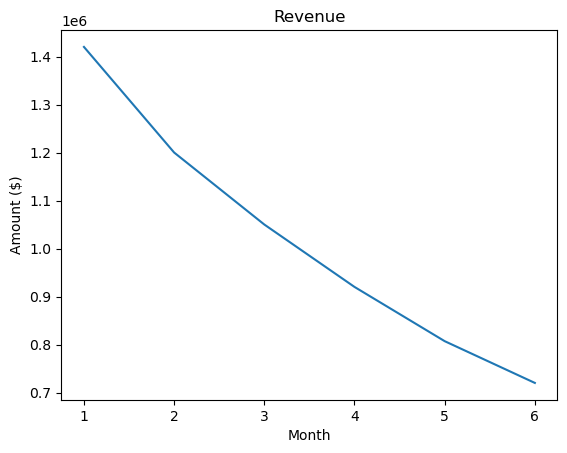

In [15]:
plt.plot(month, revenue)
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.title('Revenue')
plt.show()

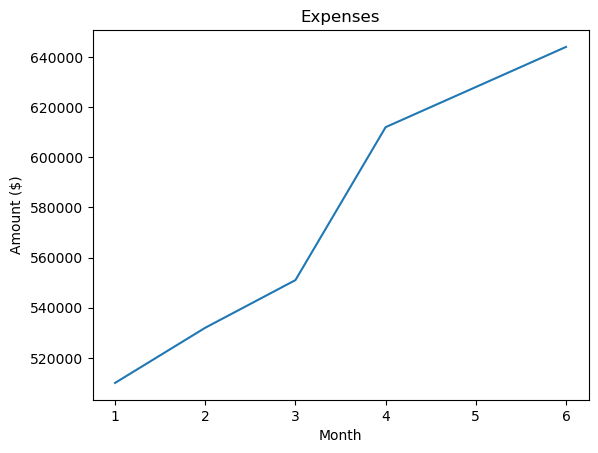

In [17]:
plt.clf()
plt.plot(month, expenses)
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.title('Expenses')
plt.show()

As shown, revenue seems to be quickly decreasing while expenses are increasing. If the current trend continues, expenses will soon surpass revenues, putting the company at risk. Let's explore the data to determine which category constitutes the company's main cost.

In [18]:
expense_categories = expense_overview['Expense']
proportions = expense_overview['Proportion']

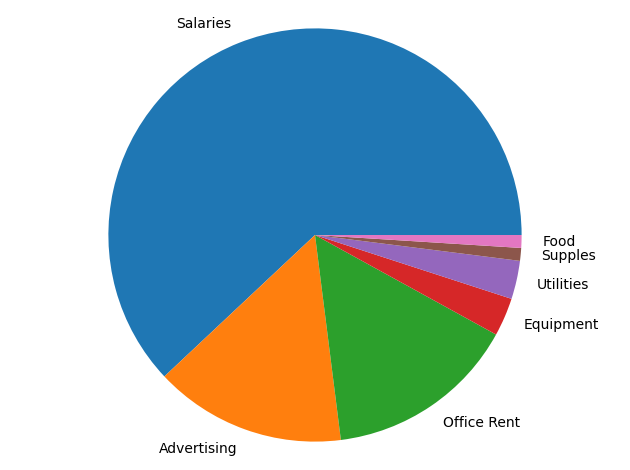

In [19]:
plt.clf()
plt.pie(proportions, labels = expense_categories)
plt.axis('Equal')
plt.tight_layout()
plt.show()

We simplify the pie chart by collapsing all categories making up less than 5% of the overall expensesto to help the management team see a big picture view of the company’s expenses without getting distracted by noisy data.

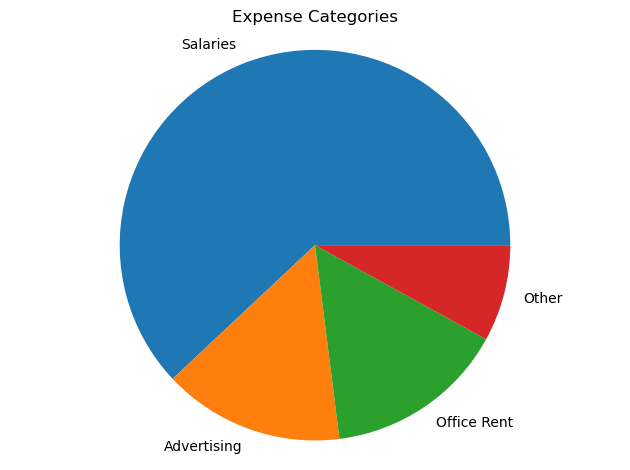

In [20]:
expense_categories = ['Salaries', 'Advertising', 'Office Rent', 'Other']
proportions = [0.62, 0.15, 0.15, 0.08]
plt.clf()
plt.pie(proportions, labels = expense_categories)
plt.title('Expense Categories')
plt.axis('Equal')
plt.tight_layout()
plt.show()

Salaries make up 62% of expenses. Therefore, to cut costs in a meaningful way, we can recommend the management to let go of some employees.

Each employee at the company is assigned a productivity score based on their work. We explore the relationship between Salary and Productivity more in depth. These two features are on vastly different scales, so we will standardize the data.

In [21]:
data_to_standardize = employees[['Salary', 'Productivity']]
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data_to_standardize)
standardized_df = pd.DataFrame(standardized_data, columns=['Standardized_Salary', 'Standardized_Productivity'])
standardized_employees = pd.concat([employees, standardized_df], axis=1)

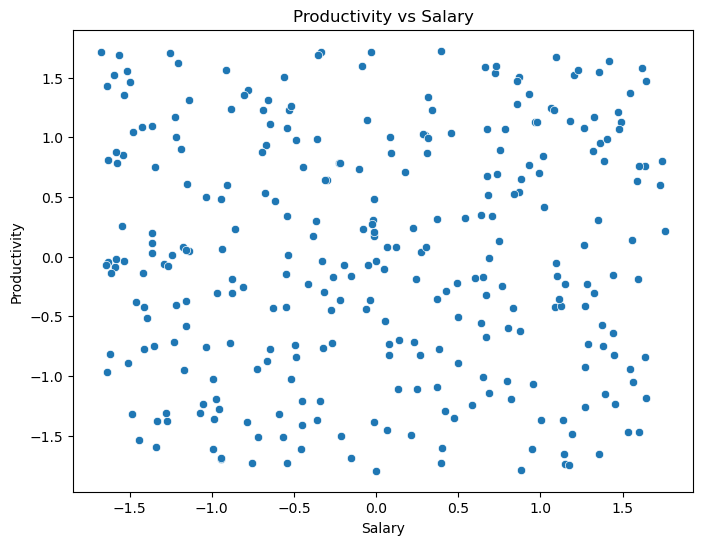

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Standardized_Salary', y='Standardized_Productivity', data=standardized_employees)
plt.title('Productivity vs Salary')
plt.xlabel('Salary')
plt.ylabel('Productivity')
plt.show()

As shown above, more productive employees don't necessarily have higher salaries. Therefore, the best decision would be to keep the most highly productive employees and let go of the least productive employees.

In [23]:
sorted_productivity = employees.sort_values(by=['Productivity'])
print(sorted_productivity.head(10))

                  Name  Salary  Productivity  Commute Time
263       Wilber Rye    111647          0.06         49.42
94    Fredric Gandee    154469          0.24         22.48
256  Johnson Fordham    168684          1.46         22.39
181    Lilia Lemoine    167579          1.67         27.36
165   Hilma Laughton     85506          1.79         36.41
192   Lucia Schipper     75085          1.88         38.15
255   Elvera Robison    130974          1.93         55.02
34   Flossie Barnard     66000          2.82         27.33
258      Ta Thrasher    104456          3.02         25.53
171   Kirstie Sauers     65824          3.05         49.56


In [24]:
employees_cut = sorted_productivity.head(100)
print(employees_cut)

                       Name  Salary  Productivity  Commute Time
263            Wilber Rye    111647          0.06         49.42
94         Fredric Gandee    154469          0.24         22.48
256       Johnson Fordham    168684          1.46         22.39
181         Lilia Lemoine    167579          1.67         27.36
165        Hilma Laughton     85506          1.79         36.41
..                      ...     ...           ...           ...
45   Bernardo Klingenberg     55464         34.52         32.27
189        Ashleigh Istre    178627         34.70         38.67
292       Penni Kimbrough    142680         35.21         49.64
273      Margot Mackenzie    114302         35.79         19.87
222        Quinn Frampton     44000         36.36         34.12

[100 rows x 4 columns]


This is the list of employees that will not have a chance to stay at the company.

Now, we do some quick analysis on the commute times of employees to see whether it is worth it for the company to explore allowing remote work indefinitely so employees can save time during the day or not.

In [25]:
commute_times = employees['Commute Time']
print(commute_times.describe())

count    300.000000
mean      33.441700
std       16.128369
min        3.220000
25%       21.667500
50%       31.060000
75%       42.190000
max      101.780000
Name: Commute Time, dtype: float64



Let’s explore the shape of the commute time data using a histogram.

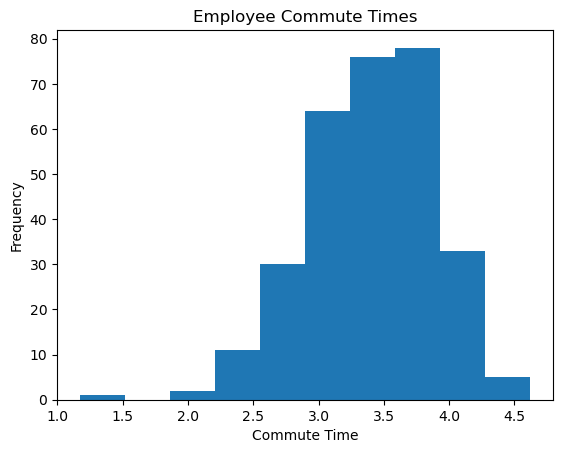

In [26]:
commute_times_log = np.log(commute_times)
plt.clf()
plt.hist(commute_times_log)
plt.title("Employee Commute Times")
plt.xlabel("Commute Time")
plt.ylabel("Frequency")
plt.show()

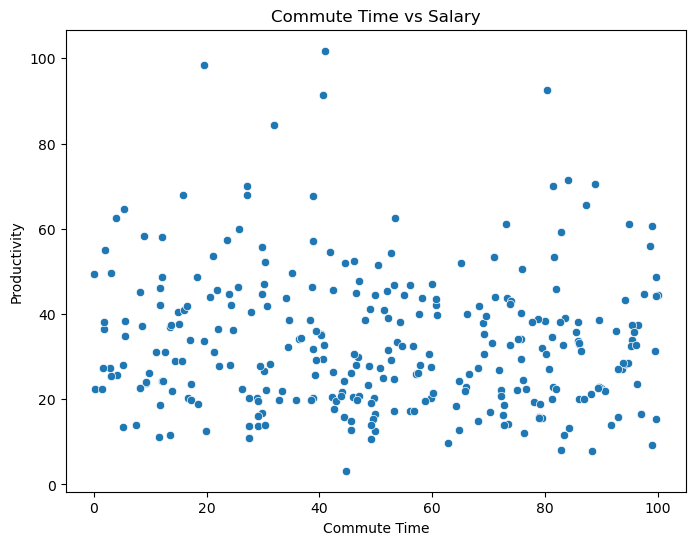

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Productivity', y='Commute Time', data=employees)
plt.title('Commute Time vs Salary')
plt.xlabel('Commute Time')
plt.ylabel('Productivity')
plt.show()

We can observe a very weak negative correlation between productivity and commute time. Therefore, maintaining a remote workplace could be a beneficial strategy to ensure maximum productivity for all employees.

Finally, let's look at the relationship between employees, salary, productivity, and commute time using correlation matrix.

In [28]:
correlation_matrix = employees[['Salary', 'Productivity', 'Commute Time']].corr()
print(correlation_matrix)

                Salary  Productivity  Commute Time
Salary        1.000000      0.017954      0.030303
Productivity  0.017954      1.000000     -0.060998
Commute Time  0.030303     -0.060998      1.000000


The correlation between Salary and Productivity is approximately 0.018. This value is close to 0, indicating a very weak positive correlation. This means that there's almost no linear relationship between an employee's salary and their productivity.

The correlation between Salary and Commute Time is approximately 0.030. Similar to the previous case, this value is also very close to 0, indicating a very weak positive correlation. It suggests that there's almost no linear relationship between an employee's salary and their commute time.

The correlation between Productivity and Commute Time is approximately -0.061. This value is also close to 0, but negative. It indicates a very weak negative correlation. This means that there's a slight tendency that as an employee's productivity decreases, their commute time might slightly increase.